In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Results/LivDet-Iris-2020/GaussianNoise/summary_sorted.csv")
df.head()

,modelA,modelB,modelA-Score,modelB-Score,ScoreFusion,KernelFusion
0,DenseNet161GaussianNoise-0.9030-.pth,DenseNet161GaussianNoise-0.9038-.pth,0.903,0.9038,0.903816,0.900577
1,DenseNet161GaussianNoise-0.9030-.pth,DenseNet161GaussianNoise-0.9059-.pth,0.903,0.9059,0.896916,0.895508
2,DenseNet161GaussianNoise-0.9030-.pth,DenseNet161GaussianNoise-0.9066-.pth,0.903,0.9066,0.902549,0.899873
3,DenseNet161GaussianNoise-0.9030-.pth,DenseNet161GaussianNoise-0.9072-.pth,0.903,0.9072,0.907337,0.920715
4,DenseNet161GaussianNoise-0.9030-.pth,DenseNet161GaussianNoise-0.9080-.pth,0.903,0.9080,0.912548,0.910013


In [3]:
true = df["ScoreFusion"] < df["KernelFusion"].values
print(true.mean())

0.5849462365591398


In [9]:
plt.figure(figsize=(10,6))
set(df["KernelFusion"].values).plot.hist(bins=20)
plt.title("Number of models with Scores")
plt.ylabel("Number of Models Taken")
plt.xlabel("TDR @ 0.002 FMR")
plt.grid()
plt.savefig(os.path.join("./Results/LivDet-Iris-2020/GaussianNoise/", "model_frequency.svg"))

AttributeError: 'set' object has no attribute 'plot'

<Figure size 720x432 with 0 Axes>

In [64]:
print(f"Total Model Combination: {len(df)}")
print(f"Total Uniquely Perturbed Models: {len(set(df['modelA']))}")

Total Model Combination: 465
Total Uniquely Perturbed Models: 30


In [5]:
from itertools import permutations, combinations


In [ ]:
combs = combinations(sorted(list(set(df["modelA"]))), r=2)
idx = 0
data=[]
for comb in combs:
    (modelA, modelB) = comb
    line = df[df["modelA"] ==comb[0]][df["modelB"] ==comb[1]].reset_index().values

    print(line)

In [59]:
len(sorted(list(set(df["modelA"]))))

31

In [14]:
idx

465

In [21]:
data

[array([['DenseNet161GaussianNoise-0.9030-.pth',
         'DenseNet161GaussianNoise-0.9038-.pth', 0.903, 0.9038,
         0.9038163638924096, 0.9005773834671174]], dtype=object),
 array([], shape=(0, 6), dtype=object),
 array([['DenseNet161GaussianNoise-0.9030-.pth',
         'DenseNet161GaussianNoise-0.9066-.pth', 0.903, 0.9066,
         0.9025489367694692, 0.899873257287706]], dtype=object),
 array([['DenseNet161GaussianNoise-0.9030-.pth',
         'DenseNet161GaussianNoise-0.9072-.pth', 0.903, 0.9072,
         0.9073369947894664, 0.920715392198282]], dtype=object),
 array([['DenseNet161GaussianNoise-0.9030-.pth',
         'DenseNet161GaussianNoise-0.9080-.pth', 0.903, 0.908,
         0.9125475285171104, 0.9100126742712294]], dtype=object),
 array([['DenseNet161GaussianNoise-0.9030-.pth',
         'DenseNet161GaussianNoise-0.9087-.pth', 0.903, 0.9087,
         0.9214195183776932, 0.9381777214476834]], dtype=object),
 array([['DenseNet161GaussianNoise-0.9030-.pth',
         'DenseNet1

In [35]:
df_new = df.copy()

count=0
for idx, row in df_new.iterrows():
    if row["modelB"] < row["modelA"]:
        temp = df_new.iloc[idx, 0]
        df_new.iloc[idx, 0] = df_new.iloc[idx, 1]
        df_new.iloc[idx, 1] = temp
        
        
        temp = df_new.iloc[idx, 2]
        df_new.iloc[idx, 2] = df_new.iloc[idx, 3]
        df_new.iloc[idx, 3] = temp

        

In [36]:
df_new

,modelA,modelB,modelA-Score,modelB-Score,RegularFusion,KernelFusion
0,DenseNet161GaussianNoise-0.9168-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9168,0.9418,0.920434,0.929024
1,DenseNet161GaussianNoise-0.9204-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9204,0.9418,0.927475,0.933530
2,DenseNet161GaussianNoise-0.9316-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9316,0.9418,0.938600,0.942966
3,DenseNet161GaussianNoise-0.9145-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9145,0.9418,0.920997,0.923250
4,DenseNet161GaussianNoise-0.9137-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9137,0.9418,0.921983,0.937051
...,...,...,...,...,...,...
491,DenseNet161GaussianNoise-0.9114-.pth,DenseNet161GaussianNoise-0.9203-.pth,0.9114,0.9203,0.915646,0.918462
492,DenseNet161GaussianNoise-0.9203-.pth,DenseNet161GaussianNoise-0.9340-.pth,0.9203,0.9340,0.935784,0.940572
493,DenseNet161GaussianNoise-0.9114-.pth,DenseNet161GaussianNoise-0.9321-.pth,0.9114,0.9321,0.914378,0.926489
494,DenseNet161GaussianNoise-0.9321-.pth,DenseNet161GaussianNoise-0.9340-.pth,0.9321,0.9340,0.929587,0.937896


In [39]:
df_new


,modelA,modelB,modelA-Score,modelB-Score,RegularFusion,KernelFusion
0,DenseNet161GaussianNoise-0.9168-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9168,0.9418,0.920434,0.929024
1,DenseNet161GaussianNoise-0.9204-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9204,0.9418,0.927475,0.933530
2,DenseNet161GaussianNoise-0.9316-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9316,0.9418,0.938600,0.942966
3,DenseNet161GaussianNoise-0.9145-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9145,0.9418,0.920997,0.923250
4,DenseNet161GaussianNoise-0.9137-.pth,DenseNet161GaussianNoise-0.9418-.pth,0.9137,0.9418,0.921983,0.937051
...,...,...,...,...,...,...
491,DenseNet161GaussianNoise-0.9114-.pth,DenseNet161GaussianNoise-0.9203-.pth,0.9114,0.9203,0.915646,0.918462
492,DenseNet161GaussianNoise-0.9203-.pth,DenseNet161GaussianNoise-0.9340-.pth,0.9203,0.9340,0.935784,0.940572
493,DenseNet161GaussianNoise-0.9114-.pth,DenseNet161GaussianNoise-0.9321-.pth,0.9114,0.9321,0.914378,0.926489
494,DenseNet161GaussianNoise-0.9321-.pth,DenseNet161GaussianNoise-0.9340-.pth,0.9321,0.9340,0.929587,0.937896


In [40]:
df_new.to_csv("./Results/LivDet-Iris-2020/GaussianNoise/summary_sorted.csv", index = False)

In [46]:
combs = combinations(sorted(list(set(df["modelA"].values))), r=2)
combs = list(combs)
res = []
for comb in combs:
    A = df_new[df_new["modelA"] == comb[0]].reset_index()
    B = A[A["modelB"] == comb[1]].values
    res.append(B[0])

    

In [55]:
df.columns

Index(['modelA', 'modelB', 'modelA-Score', 'modelB-Score', 'RegularFusion',
       'KernelFusion'],
      dtype='object')

In [57]:
df_grail = pd.DataFrame(res, columns =["Index", 'modelA', 'modelB', 'modelA-Score', 'modelB-Score', 'RegularFusion',
       'KernelFusion'])

In [61]:
df_grail[['modelA', 'modelB', 'modelA-Score', 'modelB-Score', 'RegularFusion',
       'KernelFusion']].to_csv("./Results/LivDet-Iris-2020/GaussianNoise/summary_sorted.csv", index = False)

In [43]:
list(combs)

[('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9038-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9059-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9066-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9072-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9080-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9087-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9090-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9114-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9116-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9124-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianNoise-0.9131-.pth'),
 ('DenseNet161GaussianNoise-0.9030-.pth',
  'DenseNet161GaussianN

In [11]:
df["ScoreFusion"].max()

0.950007041261794

In [12]:
df["KernelFusion"].max()

0.9493029150823828

In [ ]:
'Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06551d402.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06961d101.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06972d35.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07001d7.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06871d132.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06612d227.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07002d17.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06886d189.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06921d320.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06603d14.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d286.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06678d175.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06752d141.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06785d516.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06948d25.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07012d12.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06574d323.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06737d124.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06948d21.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07018d256.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06808d133.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d263.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06808d496.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06995d2.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06886d210.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07012d8.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06826d161.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07001d21.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06826d286.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06788d80.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06886d283.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06808d368.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d184.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06916d186.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06737d55.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07010d21.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06855d489.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06799d470.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06552d33.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06749d488.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07002d1.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06842d240.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06612d139.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06551d261.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06603d324.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06871d175.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06737d377.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06610d256.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06574d477.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06895d139.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06727d88.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06855d173.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06956d36.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06886d272.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07048d61.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06842d236.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06749d295.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06871d140.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06961d89.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06737d258.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06808d302.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06886d200.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06612d14.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06785d404.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06604d876.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06537d366.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06826d365.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06842d226.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06788d22.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06961d138.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06826d180.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06749d458.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06916d269.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06808d482.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06785d574.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06832d265.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d201.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06658d234.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06948d18.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07012d4.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06895d183.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07048d22.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06855d177.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06604d1160.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d365.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07002d22.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06788d318.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d194.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d246.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06829d348.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06727d80.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06948d62.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06749d57.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06788d6.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06916d275.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06895d143.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06799d464.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07002d9.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07001d3.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06775d378.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06808d123.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07048d17.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07010d8.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06662d76.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06612d9.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06895d70.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06737d60.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06961d23.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06886d174.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06921d124.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06934d214.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06916d288.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06961d91.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07018d39.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06799d459.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06921d130.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06785d568.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06610d599.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06752d64.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07036d160.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06916d203.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06972d93.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06752d68.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06752d145.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06574d32.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/07010d4.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06934d35.tiff
Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06916d284.tiff

In [19]:
from PIL import Image
import numpy as np
img_pil = Image.open("Iris_Image_Database/LivDet-iris-2017/NotreDame/train/live/06842d240.tiff")
print(img_pil.mode)
img_pil = img_pil.convert(mode="RGB")
print(img_pil.mode)
img = np.array(img_pil)
img.shape

P
RGB


(480, 640, 3)

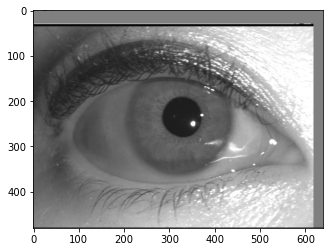

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")

In [21]:
import pandas as pd
df = pd.read_csv("Data-Splits/LivDet-Iris-2020/test_split-Seg.csv")
df.shape[1]

9

In [22]:
len(df)

12415